In [29]:
using LowLevelFEM
import LowLevelFEM as FEM

gmsh.initialize()

In [30]:
using SparseArrays, LinearAlgebra

In [31]:
gmsh.open("body2L.geo")

Info    : Reading 'body2L.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 60%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.000590428s, CPU 0.000581s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Transfinite)
Info    : [ 20%] Meshing surface 2 (Transfinite)
Info    : [ 40%] Meshing surface 3 (Transfinite)
Info    : [ 60%] Meshing surface 4 (Transfinite)
Info    : [ 70%] Meshing surface 5 (Transfinite)
Info    : [ 90%] Meshing surface 6 (Transfinite)
Info    : Done meshing 2D (Wall 0.000297836s, CPU 0.000297s)
Info    : Meshing 3

In [32]:
hooke = FEM.material("body", E=260, ν=0.3)
nonlin = FEM.material("body", E=260, ν=0.3, type=:StVenantKirchhoff)
nonlin = FEM.material("body", E=260, ν=0.3, type=:NeoHookeCompressible)
linelast = FEM.Problem([hooke])
nonlinelast = FEM.Problem([nonlin])

Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 61)
Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 61)


Problem("body2L", :Solid, 3, 3, LowLevelFEM.Material[LowLevelFEM.Material("body", :NeoHookeCompressible, 260.0, 0.3, 7.85e-9, 45.0, 4.2e8, 1.2e-5, 150.0, 100.0, 216.66666666666666)], 1.0, 525)

In [33]:
left = FEM.displacementConstraint("left", ux=0, uy=0, uz=0)
right = FEM.displacementConstraint("right", ux=0)

("right", 0, 0 + 1im, 0 + 1im)

In [34]:
fy(x, y, z) = (-z + 0.5) * 10
fz(x, y, z) = (y - 0.5) * 10
load = FEM.load("right", fy=fy, fz=fz)

("right", 0, Main.fy, Main.fz)

In [35]:
q = FEM.solveDisplacement(linelast, [load], [left, right])
A1 = FEM.solveStrain(q)
F1 = FEM.solveStress(q)

LowLevelFEM.TensorField([[3.3328144002870635e-12; 2.6553746288260203; … ; -0.22797154004264505; -0.9554500722641921;;], [2.265243548293938e-12; 1.0694912150814222; … ; 0.0630996504736997; -0.07516121542123881;;], [1.9832399611452445e-12; 1.0937769525482004; … ; -0.010637356588627522; 0.05260688049288278;;], [1.6460314014588029e-12; 1.1375480457276987; … ; 0.001142674454518433; -0.012553591169236957;;], [1.3526649418615921e-12; 1.1248040750949317; … ; -3.947178524588146e-5; 0.0019773403694252345;;], [1.0248912721104453e-12; 1.1269828647197722; … ; -1.0938816041861088e-5; -0.00020805468744057934;;], [7.546184543124473e-13; 1.1267526961179692; … ; 1.3198153347993014e-6; 1.0800699789918766e-5;;], [5.683370559518867e-13; 1.1267578398676925; … ; 5.513352385744241e-7; -6.782903691840425e-8;;], [1.474271585073881e-13; 1.1267611108576188; … ; -2.924234743240106e-7; 4.106654580629532e-7;;], [-2.705515824819282e-14; 1.1267605759986532; … ; 2.7431956706180927e-8; -5.795451722689915e-8;;]  …  [6.82

In [36]:
u1 = FEM.showDoFResults(q, :uvec)

0

In [37]:
FEM.showElementResults(A1, :ex)
FEM.showElementResults(A1, :ey)
FEM.showElementResults(A1, :ez)
FEM.showElementResults(A1, :exy)
FEM.showElementResults(A1, :eyz)
FEM.showElementResults(A1, :ezx)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


6

In [38]:
r, e = FEM.solveDeformation(nonlinelast, [load], [left, right],
    followerLoad=true,
    loadSteps=50,
    rampedLoad=true,
    rampedSupport=false,
    maxIteration=10,
    saveSteps=true,
    saveIterations=false,
    plotConvergence=true,
    relativeError=1e-3
)

(LowLevelFEM.VectorField(Matrix{Float64}[], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.7499999999999999 0.7293977363010409 … 0.42065565005013755 0.418404076238491; 0.75 0.7690359349082503 … 0.8440312785684131 0.843494011082598], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0  …  42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0], Int64[], 51, :u3D, Problem("body2L", :Solid, 3, 3, LowLevelFEM.Material[LowLevelFEM.Material("body", :NeoHookeCompressible, 260.0, 0.3, 7.85e-9, 45.0, 4.2e8, 1.2e-5, 150.0, 100.0, 216.66666666666666)], 1.0, 525)), Any[0.004475489571381232, 0.0006053266120670971, 0.0009331358505903244, 0.0031377010471245097, 0.00025514732184410643, 0.002515556193525864, 0.0005814236212528829, 0.00315462118725656, 0.0007024539836037191, 0.0032088942574613538  …  0.0012335859849159122, 0.0007104748470859187, 0.0012701363090460156, 0.0007676851384104384, 0.0013141782648028613, 0.0008318335461273982, 0.0013660910910114235, 0.0009032777387949949, 0.0014261502236183987

In [39]:
r1 = FEM.showDeformationResults(r, :uvec)

7

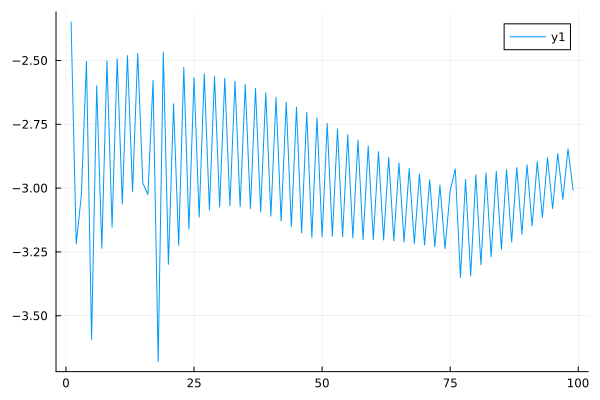

In [40]:
using Plots
plot(log10.(e))

In [41]:
FEM.probe(r, 5, 0.3, 0.3, step=r.nsteps)

3-element Vector{Float64}:
 5.0008305778
 0.4306724015
 0.2257218926

In [42]:
FEM.probe(r, "A", step=r.nsteps)

3-element Vector{Float64}:
 9.0014774087
 0.4231309311
 0.9173527333

In [43]:
D = q ∘ ∇

LowLevelFEM.TensorField([[9.522326857963039e-15; 0.026553746288260204; … ; -0.05361991761192196; 0.00016297337733300193;;], [1.0530144108170825e-14; 0.028428272921430128; … ; -0.10974644088747489; -0.00010565960493456872;;], [8.539098826989606e-15; 0.028129527879104735; … ; -0.16628036056916817; 3.639450085066165e-5;;], [7.296110812906545e-15; 0.028175612871722072; … ; -0.22256273455150322; -9.39775625513617e-6;;], [6.015186575322744e-15; 0.028167640208564076; … ; -0.2789115648720501; 2.0619607270511153e-6;;], [4.712547848820874e-15; 0.028169351564211187; … ; -0.33524799806170225; -4.1780689158388284e-7;;], [3.559691844527883e-15; 0.028168928565314055; … ; -0.39158621166749047; 8.452061406316602e-8;;], [2.3272180873347123e-15; 0.02816903498548662; … ; -0.44792421977187435; -1.813187000543337e-8;;], [1.13493525424807e-15; 0.028169009221420627; … ; -0.5042622516655383; 4.04318833968631e-9;;], [1.7861521473841038e-17; 0.028169015027600275; … ; -0.5606002788173684; -3.186261254839451e-10;;

In [44]:
A2 = (D + D') / 2

LowLevelFEM.TensorField([[9.522326857963039e-15; 0.013276873144130102; … ; -0.0011398577002132183; 0.00016297337733300193;;], [1.0530144108170825e-14; 0.0053474560754071115; … ; 0.00031549825236849155; -0.00010565960493456872;;], [8.539098826989606e-15; 0.005468884762741006; … ; -5.318678294313761e-5; 3.639450085066165e-5;;], [7.296110812906545e-15; 0.005687740228638492; … ; 5.713372272592165e-6; -9.39775625513617e-6;;], [6.015186575322744e-15; 0.00562402037547465; … ; -1.9735892620165174e-7; 2.0619607270511153e-6;;], [4.712547848820874e-15; 0.0056349143235988625; … ; -5.469408015379429e-8; -4.1780689158388284e-7;;], [3.559691844527883e-15; 0.005633763480589839; … ; 6.599076673996507e-9; 8.452061406316602e-8;;], [2.3272180873347123e-15; 0.005633789199338461; … ; 2.756676248383272e-9; -1.813187000543337e-8;;], [1.13493525424807e-15; 0.00563380555428809; … ; -1.4621174271312043e-9; 4.04318833968631e-9;;], [1.7861521473841038e-17; 0.005633802879993264; … ; 1.3715983904205586e-10; -3.18626

In [45]:
FEM.probe(q, 9, 0.8, 0.8)

3-element Vector{Float64}:
 -0.0
 -0.3033791313
  0.3033791313

In [46]:
FEM.probe(A1, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
  0.0         -0.00851159   0.00851159
 -0.00851159   4.53547e-5  -0.0
  0.00851159  -0.0         -4.53547e-5

In [47]:
FEM.probe(A2, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
  0.0         -0.00851159   0.00851159
 -0.00851159   4.53547e-5  -0.0
  0.00851159  -0.0         -4.53547e-5

In [48]:
A11 = FEM.elementsToNodes(A1)
A22 = FEM.elementsToNodes(A2)

LowLevelFEM.TensorField(Matrix{Float64}[], [3.3695887709542046e-14; -0.026152667041322512; … ; 6.106226635438361e-16; 0.00020560496768139028;;], [0.0], Int64[], 1, :e, Problem("body2L", :Solid, 3, 3, LowLevelFEM.Material[LowLevelFEM.Material("body", :Hooke, 260.0, 0.3, 7.85e-9, 45.0, 4.2e8, 1.2e-5, 150.0, 100.0, 216.66666666666666)], 1.0, 525))

In [49]:
FEM.probe(A11, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
  0.0        -0.0125299     0.0125299
 -0.0125299   0.000105395  -0.0
  0.0125299  -0.0          -0.000105395

In [50]:
FEM.probe(A22, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
  0.0        -0.0125299     0.0125299
 -0.0125299   0.000105395  -0.0
  0.0125299  -0.0          -0.000105395

In [51]:
Ex = linelast.material[1].E
ν = linelast.material[1].ν
I = unitTensor(A2)
F2 = Ex / (1 + ν) * (A2 + ν / (1 - 2ν) * I * trace(A2))

LowLevelFEM.TensorField([[2.6712023059526315e-12; 2.6553746288260203; … ; -0.22797154004264367; -0.7447969769270775;;], [2.872765755994189e-12; 1.0694912150814222; … ; 0.06309965047369831; -0.7985235733805915;;], [2.474556699757945e-12; 1.0937769525482013; … ; -0.010637356588627522; -0.7701127522235456;;], [2.2259590969413327e-12; 1.1375480457276983; … ; 0.001142674454518433; -0.7792712036447051;;], [1.9697742494245727e-12; 1.12480407509493; … ; -3.947178524033035e-5; -0.7769792602482677;;], [1.7092465041241988e-12; 1.1269828647197726; … ; -1.0938816030758858e-5; -0.7774752137719947;;], [1.4786753032656004e-12; 1.1267526961179677; … ; 1.3198153347993014e-6; -0.7773747482708653;;], [1.2321805518269661e-12; 1.126757839867692; … ; 5.513352496766544e-7; -0.777395278767679;;], [9.937239852096377e-13; 1.1267611108576179; … ; -2.9242348542624086e-7; -0.77739084375601;;], [7.703092386547919e-13; 1.1267605759986528; … ; 2.7431967808411173e-8; -0.777391716118903;;]  …  [1.2516958385507373e-12; -

In [52]:
FEM.probe(F1, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
  0.0      -1.70232      1.70232
 -1.70232   0.00907094  -0.0
  1.70232  -0.0         -0.00907094

In [53]:
FEM.probe(F2, 9, 0.8, 0.8)

3×3 Matrix{Float64}:
  0.0      -1.70232      1.70232
 -1.70232   0.00907094  -0.0
  1.70232  -0.0         -0.00907094

In [54]:
FEM.showElementResults(A2, :ex)
FEM.showElementResults(A2, :ey)
FEM.showElementResults(A2, :ez)
FEM.showElementResults(A2, :exy)
FEM.showElementResults(A2, :eyz)
FEM.showElementResults(A2, :ezx)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)
Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


13

In [55]:
FEM.openPostProcessor()

-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 19700101
Build host    : amdci7.julia.csail.mit.edu
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.7.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


XRequest.18: BadValue 0x0


In [56]:
gmsh.finalize()